## Project 1 - Healthcare 

## 1. Import and warehouse data:
    a. Import all the given datasets and explore shape and size of each.
    b. Merge all datasets onto one and explore final shape and size.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline

In [2]:
# Importing the data and viewing its details

df1 = pd.read_csv('Part1+-+Normal.csv') 
df2 = pd.read_csv('Part1+-+Type_H.csv') 
df3 = pd.read_csv('Part1+-+Type_S.csv') 
print(f'Shape : {df1.shape}, and size of Normal File : {df1.size}\nFile Content : \n{df1.head()}')
print(f'\nShape : {df2.shape}, and size of Type-H File : {df2.size}\nFile Content : \n{df2.head()}')
print(f'\nShape : {df3.shape}, and size of Type-S File : {df3.size}\nFile Content : \n{df3.head()}')

Shape : (100, 7), and size of Normal File : 700
File Content : 
   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

Shape : (60, 7), and size of Type-H File : 420
File Content : 
   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.7

In [3]:
# Concatinating the files

df_test = pd.concat([df1,df2,df3], axis=0)
print(f'\nShape : {df_test.shape}, and size of Data Frame : {df_test.size}\nFile Content : \n{df_test.head()}')


Shape : (310, 7), and size of Data Frame : 2170
File Content : 
   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal


## 2. Data cleansing:
    a. Explore and if required correct the datatypes of each attribute
    b. Explore for null values in the attributes and if required drop or impute values

In [4]:
# Since the data of classes are non numeric lets look at it

df_test["Class"].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

In [5]:
# Replacing the Mis-spelled data and cross-checking

df_test.loc[df_test['Class']=='tp_s','Class']='Type_S'
df_test.loc[df_test['Class']=='Nrmal','Class']='Normal'
df_test.loc[df_test['Class']=='type_h','Class']='Type_H'

df_test["Class"].unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [6]:
# Changing the datatype of the Class and cross-checking

df_test['Class']=df_test['Class'].astype('category')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 17.4 KB


In [7]:
# Checking for null values

df_test.isnull().values.any()

False

In [8]:
df.to_excel('test.xlsx',sheet_name='Sheet1')

AttributeError: 'DataFrame' object has no attribute 'save'

## 3. Data analysis & visualisation:
    a. Perform detailed statistical analysis on the data.
    b. Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each 
    analysis. 

In [8]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


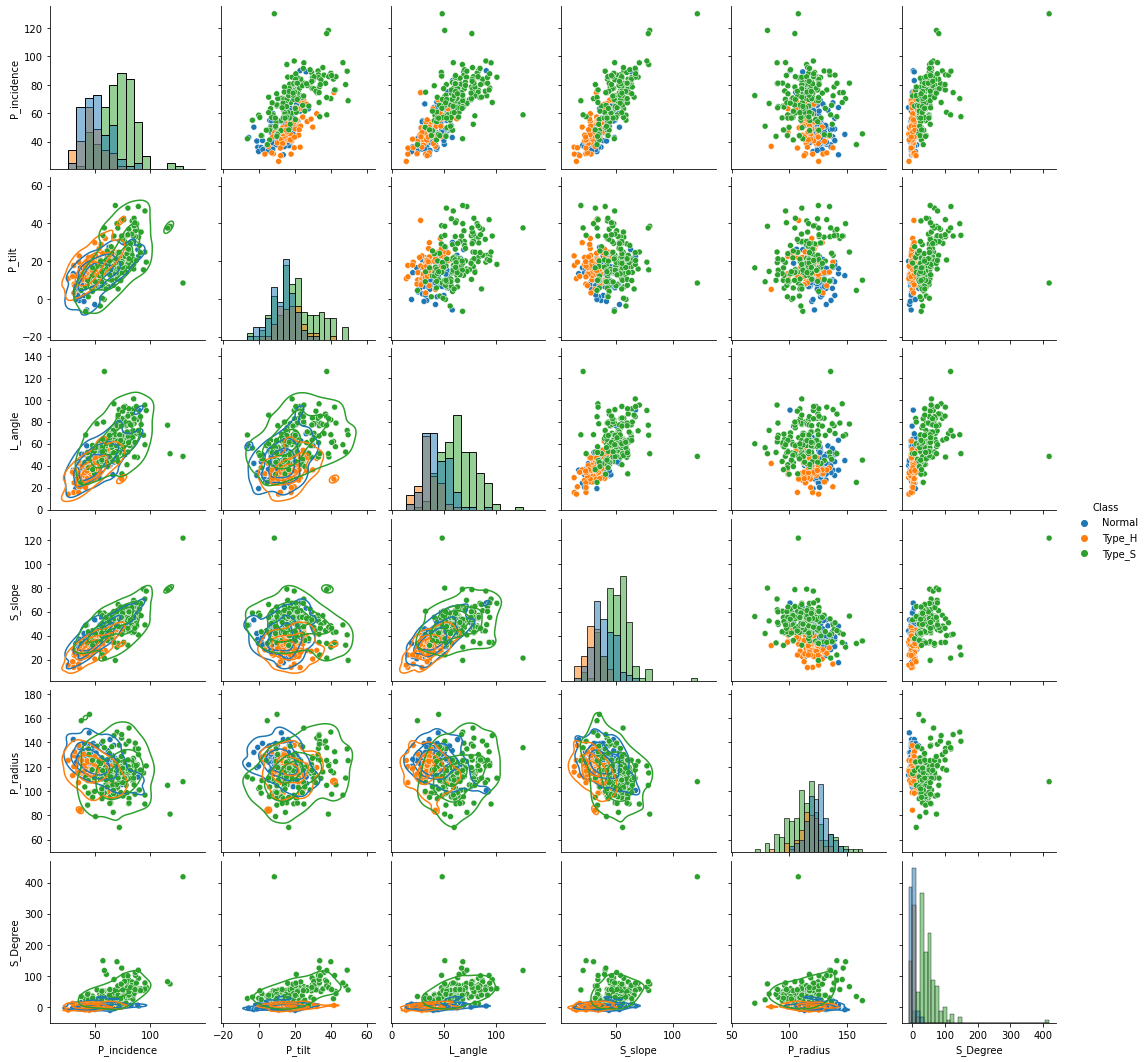

In [9]:
g = sns.pairplot(df_test, hue = 'Class', diag_kind="hist")
g.map_lower(sns.kdeplot, levels=4, color=".2")

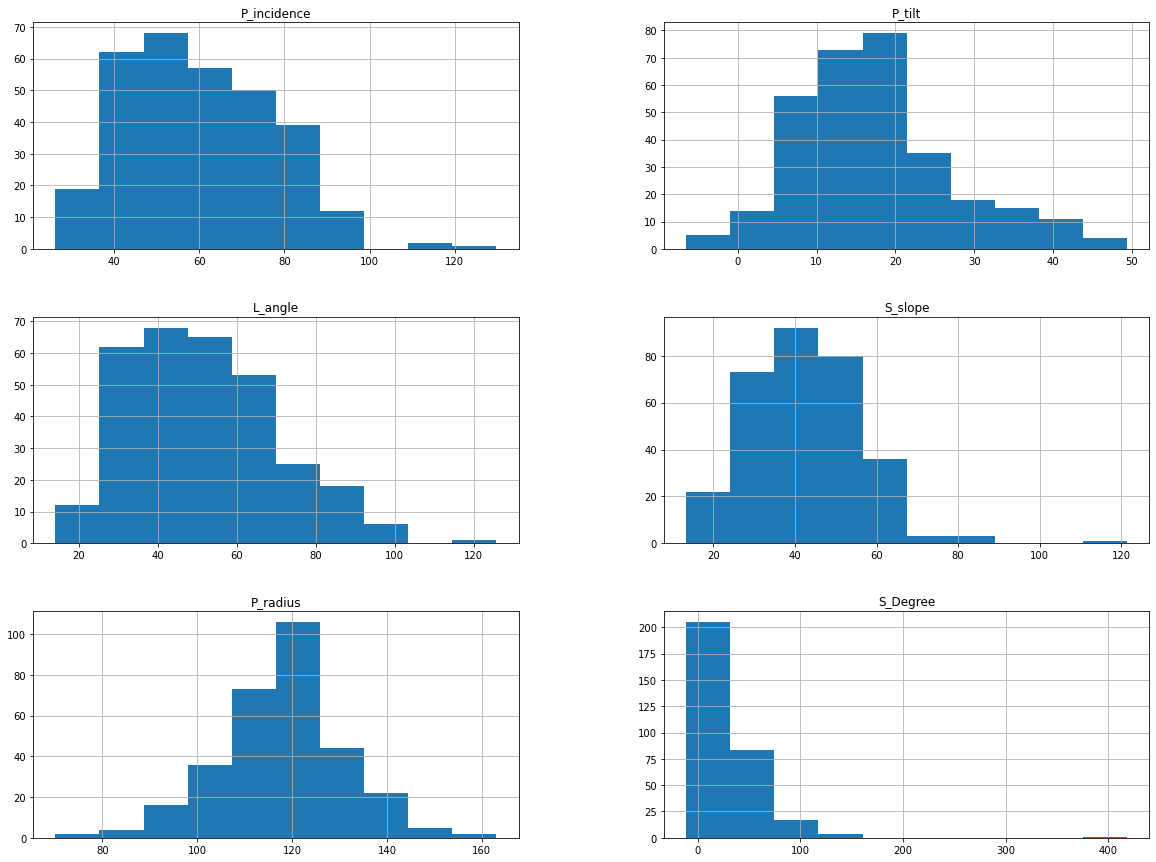

In [10]:
df_test.hist(figsize = (20,15))
plt.show()

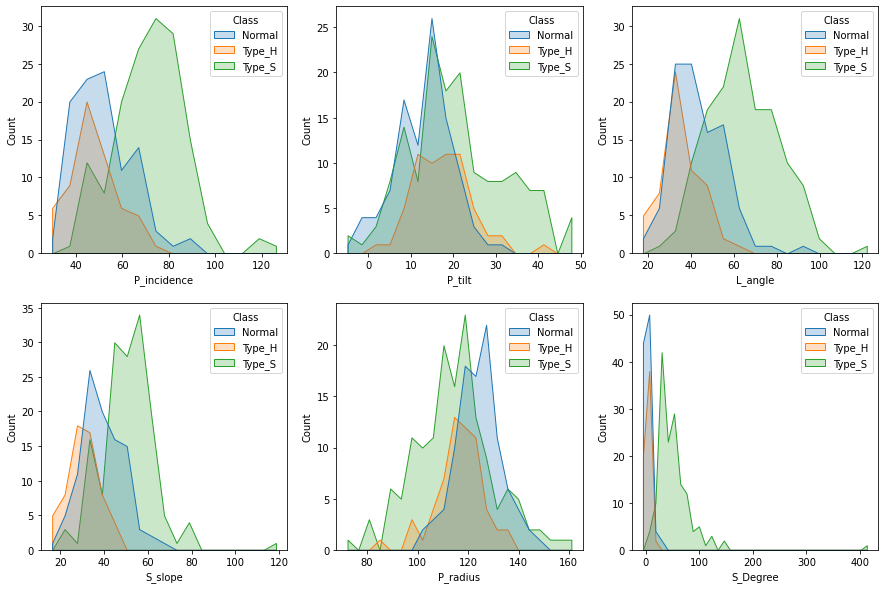

In [11]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
listOfColumns = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
len_listOfColumns = len(listOfColumns)
index = 0
for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.histplot(data=df_test, x = df_test[listOfColumns[index]], hue = "Class",element="poly",ax = ax[j][i]) 
            #sns.histplot(data=df_test, x="L_angle", hue="Class")            
            index = index + 1 
fig.show()

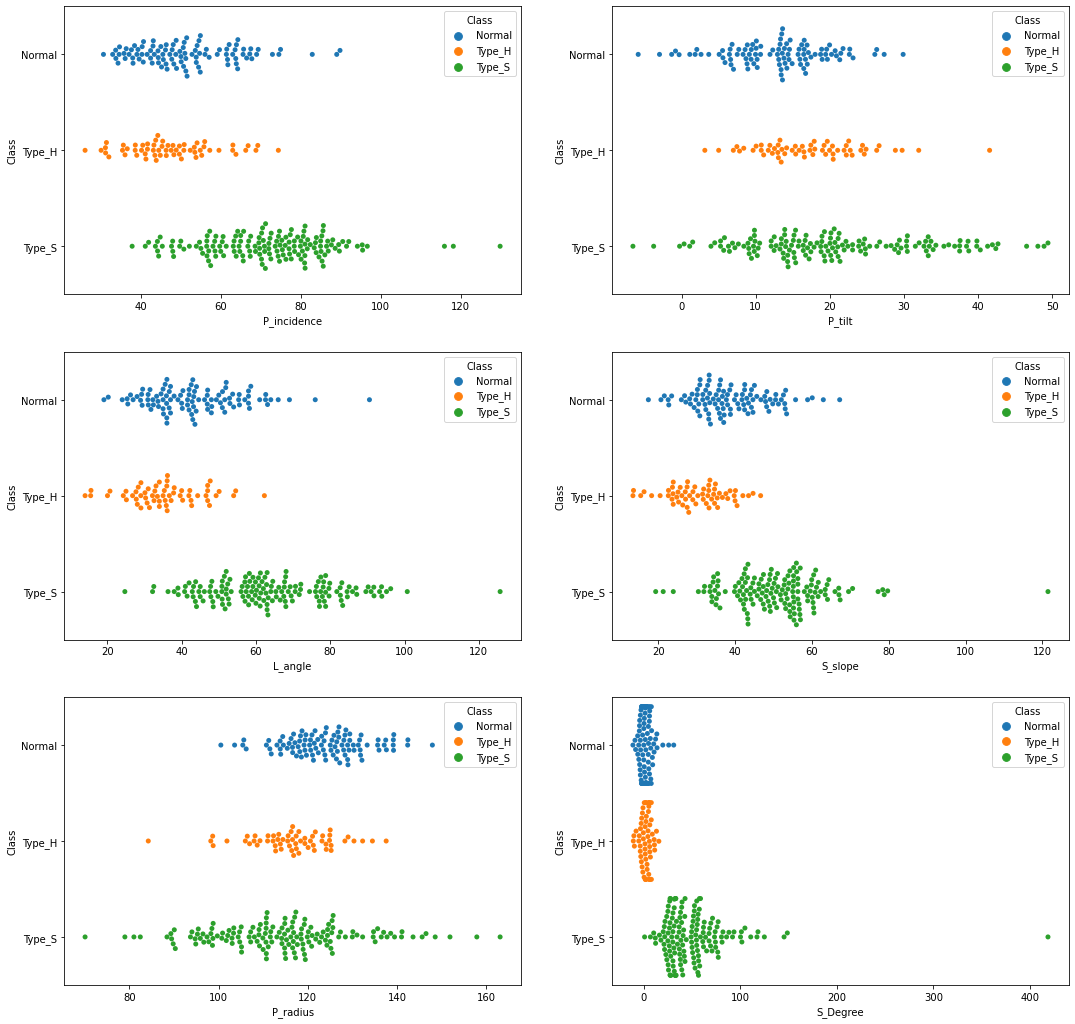

In [12]:
fig, ax = plt.subplots(3,2, figsize=(18,18))
listOfColumns = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']

len_listOfColumns = len(listOfColumns)
index = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.swarmplot(data = df_test, x=df_test[listOfColumns[index]], y=df_test['Class'], hue="Class",ax = ax[j][i]) 
            #sns.swarmplot(data=tips, x="total_bill", y="day", hue="day", legend=False)
            index = index + 1 
fig.show()

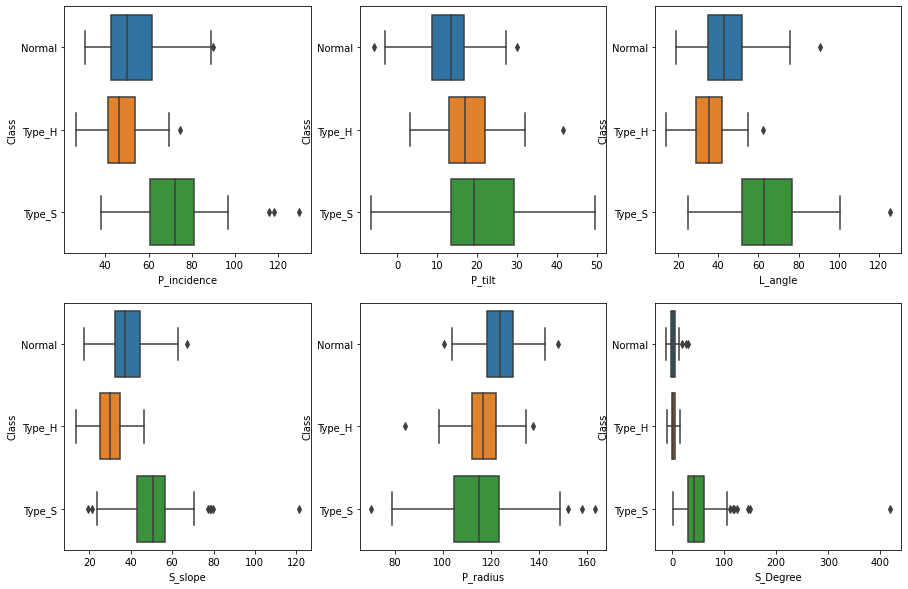

In [13]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
listOfColumns = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
len_listOfColumns = len(listOfColumns)
index = 0
for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.boxplot(data=df_test, x = df_test[listOfColumns[index]],y=df_test['Class'],ax = ax[j][i]) 
            #sns.violinplot(data=df, x="class", y="age", hue="alive")            
            index = index + 1 
fig.show()

<AxesSubplot:>

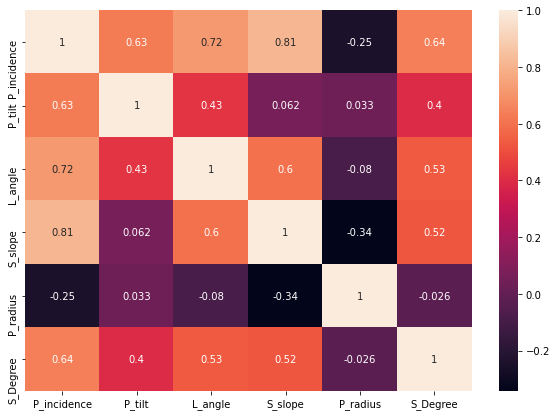

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df_test.corr(),annot=True)

##    4. Data pre-processing:
      a. Segregate predictors vs target attributes
      b. Perform normalisation or scaling if required.
      c. Check for target balancing. Add your comments.
      d. Perform train-test split.

In [15]:
# Converting the Alphabetic data into  numeric for ease of analysis
la = LabelEncoder()
df_test['Class']=la.fit_transform(df_test['Class'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 26.3 KB


In [16]:
list_of_df_col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']

for i in range(5):
    for col in list_of_df_col:
        Q1 = np.percentile(df_test[col],25)
        Q3 = np.percentile(df_test[col],75)
        Threshold=(Q3 - Q1) * 1.5
        lower = Q1 - Threshold
        upper = Q3 + Threshold
        
        # Create arrays of Boolean values indicating the outlier rows
        df_include = df_test.loc[(df_test[col] >= lower) & (df_test[col] <= upper)]
        mean = int(df_include[col].mean())
        
        # Removing the outliers
        df_test[col] = np.where(df_test[col]>upper,mean,df_test[col])
        df_test[col] = np.where(df_test[col]<lower,mean,df_test[col])

##    5. Model training, testing and tuning:
      a. Design and train a KNN classifier.
      b. Display the classification accuracies for train and test data.
      c. Display and explain the classification report in detail.
      d. Automate the task of finding best values of K for KNN.
      e. Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained 
    model with your comments for selecting this model. 

In [17]:
# Segregate features and class variables
x_data = df_test[['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']]
y_data = df_test['Class']

In [18]:
# Standardization of data

X_std = pd.DataFrame(StandardScaler().fit_transform(x_data))
X_std.columns = x_data.columns

In [19]:
#split the dataset into training and test datasets
# Transform data into features and target
X = np.array(X_std) 
y = np.array(y_data)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

knn = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean')

# fitting the model
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)

# predict the response
y_pred = knn.predict(X_test)



In [20]:
train_accuracy=accuracy_score(y_train, y_pred_train)
print('train Accuracy: ',np.round(train_accuracy,4))

# print classification report
print("classification report for train")
print(classification_report(y_train, y_pred_train))

train Accuracy:  0.8848
classification report for train
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        72
           1       0.79      0.79      0.79        42
           2       0.96      0.93      0.95       103

    accuracy                           0.88       217
   macro avg       0.86      0.86      0.86       217
weighted avg       0.89      0.88      0.89       217



In [21]:
train_accuracy=accuracy_score(y_test, y_pred)
print('train Accuracy: ',np.round(train_accuracy,4))

# print classification report
print("classification report for train")
print(classification_report(y_test, y_pred))

train Accuracy:  0.8065
classification report for train
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.58      0.78      0.67        18
           2       0.98      0.89      0.93        47

    accuracy                           0.81        93
   macro avg       0.76      0.78      0.77        93
weighted avg       0.83      0.81      0.81        93



Text(0, 0.5, 'Error Rate')

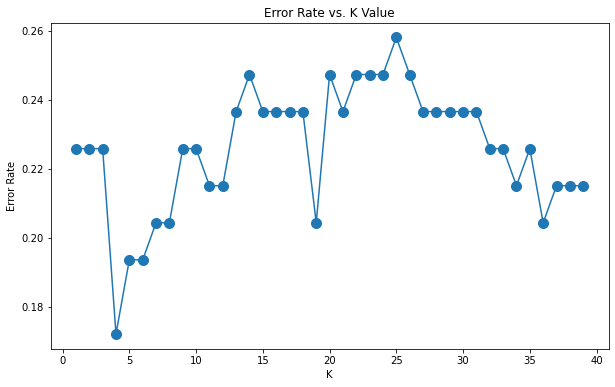

In [22]:
error_rate = []
# Will take some time
for i in range(1,40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
# NOW WITH K=4

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[21  7  0]
 [ 5 13  0]
 [ 2  2 43]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.59      0.72      0.65        18
           2       1.00      0.91      0.96        47

    accuracy                           0.83        93
   macro avg       0.78      0.80      0.79        93
weighted avg       0.85      0.83      0.83        93



In [24]:
# NOW WITH K=19

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[19  8  1]
 [ 4 14  0]
 [ 4  2 41]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.58      0.78      0.67        18
           2       0.98      0.87      0.92        47

    accuracy                           0.80        93
   macro avg       0.75      0.78      0.76        93
weighted avg       0.82      0.80      0.80        93



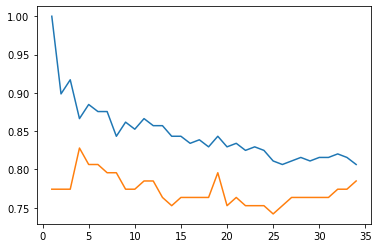

In [25]:
train_score=[]
test_score=[]
for k in range(1,35):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))
    
plt.plot(range(1,35),train_score)
plt.plot(range(1,35),test_score)
plt.show()

##    6. Conclusion and improvisation:
      a. Write your conclusion on the results.
      b. Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.
#####    Conclusion:
    * To predict the condition of patient, KNN model with k value as 4 is recommended. It has most of the predicting parameters results high such as Accuracy, Precision,F1 ,precision and recall.   
#####    Improvement: 
    * Many other parameters are masked which could be essential in prediction, and few parameters which we do not have proper understanding how this could be contributing in prediction such as Zipcode. 
    * Instead of Zipcode if proper loction is give it could give us clear picture of location than zipcode.